In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-1/SRA611700_SRS2532369.mat
/kaggle/input/raw-data/u2os_ann_procpool.h5ad


In [3]:
!pip install scanpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 25.2 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.1/96.1 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.5/63.5 kB 4.7 MB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8046 sha256=5f34e950faa8654872ef3cca95e29fdf52f96f94cb23dddd63e59381e169af4a
  Stored in directory: /root/.cache/pip/wheels/e6/3e/d2/2325892469be5cc93dbc1dbe101d0fc48b4765adfb1973b583
Successfully built session-info


In [4]:
import scanpy as sc
import pandas as pd
import numpy as np

In [5]:
adata = sc.read('/kaggle/input/raw-data/u2os_ann_procpool.h5ad')
adata

AnnData object with n_obs × n_vars = 1102 × 10000
    obs: 'cell_cycle_phase', 'n_genes_by_counts', 'pct_counts_mt', 'total_counts', 'total_counts_mt'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'mean_counts', 'mt', 'n_cells_by_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'ind_genes', 'ind_samples', 'pca', 'scycle'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'ambiguous', 'matrix', 'spanning', 'spliced', 'unspliced'

In [6]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

In [7]:
adata.var[adata.var.mt == True]

,Accession,Chromosome,End,Start,Strand,mean_counts,mt,n_cells_by_counts,pct_dropout_by_counts,total_counts,n_cells
MT-CYB,ENSG00000198727,MT,15887,14747,+,4166.554199,True,1102,0.0,4.591542e+06,1102
MT-ND2,ENSG00000198763,MT,5511,4470,+,757.461304,True,1102,0.0,8.347224e+05,1102
MT-ND3,ENSG00000198840,MT,10404,10059,+,97.543159,True,1102,0.0,1.074926e+05,1102
MT-ND4,ENSG00000198886,MT,12137,10760,+,2559.722412,True,1102,0.0,2.820814e+06,1102
MT-CO3,ENSG00000198938,MT,9990,9207,+,2517.795166,True,1102,0.0,2.774610e+06,1102
MT-RNR2,ENSG00000210082,MT,3229,1671,+,46020.511719,True,1102,0.0,5.071460e+07,1102
MT-RNR1,ENSG00000211459,MT,1601,648,+,895.168091,True,1102,0.0,9.864752e+05,1102


In [8]:
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

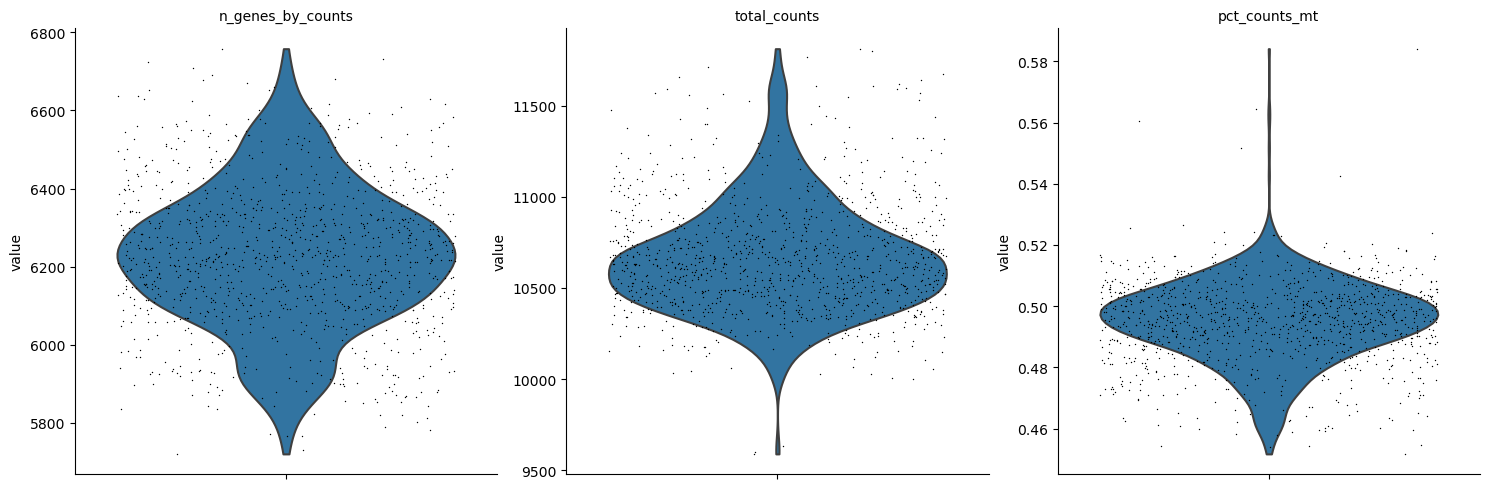

In [9]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4, multi_panel=True)

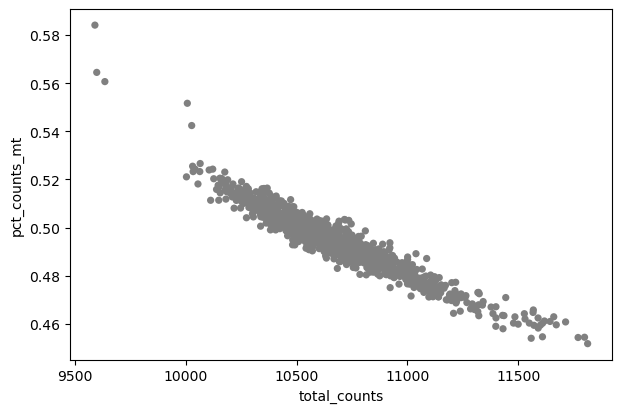

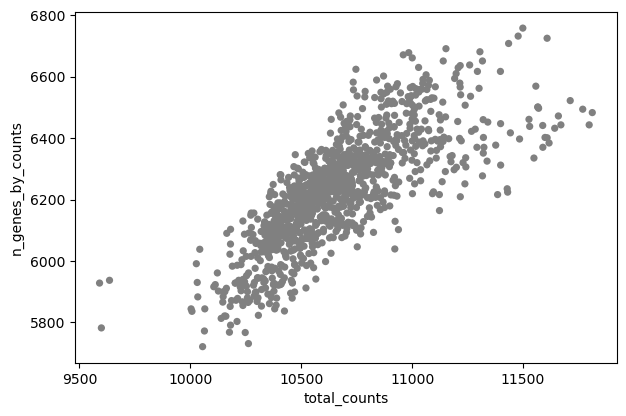

In [10]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [11]:
upper_lim = np.quantile(adata.obs.n_genes_by_counts.values, .98)
lower_lim = np.quantile(adata.obs.n_genes_by_counts.values, .02)
print(f'{lower_lim} to {upper_lim}')

5865.02 to 6590.96


In [12]:
adata[adata.obs.index == 'onefilepercell_A10_R131824Aligned_and_others_NLM7W:A10_R131824Aligned.sortedByCoord.out.bam']

View of AnnData object with n_obs × n_vars = 1 × 9939
    obs: 'cell_cycle_phase', 'n_genes_by_counts', 'pct_counts_mt', 'total_counts', 'total_counts_mt', 'n_genes'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'mean_counts', 'mt', 'n_cells_by_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'
    uns: 'ind_genes', 'ind_samples', 'pca', 'scycle'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'ambiguous', 'matrix', 'spanning', 'spliced', 'unspliced'

In [13]:
adata.var

,Accession,Chromosome,End,Start,Strand,mean_counts,mt,n_cells_by_counts,pct_dropout_by_counts,total_counts,n_cells
TSPAN6,ENSG00000000003,X,100639991,100627109,-,3.570280,False,1102,0.000000,3934.447998,1102
SCYL3,ENSG00000000457,1,169894267,169849631,-,0.851955,False,1087,1.361162,938.854065,1087
C1orf112,ENSG00000000460,1,169854080,169662007,+,2.663684,False,1099,0.272232,2935.379883,1099
CFH,ENSG00000000971,1,196747504,196651878,+,0.160571,False,459,58.348457,176.949112,459
GCLC,ENSG00000001084,6,53616970,53497341,-,2.293322,False,1102,0.000000,2527.240967,1102
...,...,...,...,...,...,...,...,...,...,...,...
AL008725.1,ENSG00000286100,20,44885604,44864435,-,0.017227,False,154,86.025408,18.984118,154
AC022868.2,ENSG00000286113,8,73882733,73879046,+,0.010010,False,28,97.459165,11.030986,28
AL732406.1,ENSG00000286151,1,157417259,157400927,+,0.028337,False,156,85.843920,31.227755,156
AC116317.1,ENSG00000286176,4,6308636,6302886,-,0.021538,False,96,91.288566,23.734528,96


In [14]:
adata = adata[(adata.obs.n_genes_by_counts < upper_lim) & (adata.obs.n_genes_by_counts > lower_lim)]
adata = adata[adata.obs.pct_counts_mt < 0.54]

In [15]:
adata.X[16,:].sum()

ArrayView(10658.697, dtype=float32)

In [16]:
sc.pp.normalize_total(adata, target_sum=1e4)

/opt/conda/lib/python3.7/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [17]:
adata.X[16,:].sum()

10000.001

In [18]:
sc.pp.log1p(adata)

In [19]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

In [20]:
adata.var

,Accession,Chromosome,End,Start,Strand,mean_counts,mt,n_cells_by_counts,pct_dropout_by_counts,total_counts,n_cells,highly_variable,means,dispersions,dispersions_norm
TSPAN6,ENSG00000000003,X,100639991,100627109,-,3.570280,False,1102,0.000000,3934.447998,1102,False,1.469868,-4.928998,-1.124958
SCYL3,ENSG00000000457,1,169894267,169849631,-,0.851955,False,1087,1.361162,938.854065,1087,False,0.586979,-1.779560,-0.637643
C1orf112,ENSG00000000460,1,169854080,169662007,+,2.663684,False,1099,0.272232,2935.379883,1099,True,1.254161,-2.342053,1.639914
CFH,ENSG00000000971,1,196747504,196651878,+,0.160571,False,459,58.348457,176.949112,459,True,0.137841,-0.897762,1.071075
GCLC,ENSG00000001084,6,53616970,53497341,-,2.293322,False,1102,0.000000,2527.240967,1102,False,1.148965,-2.983956,0.223541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AL008725.1,ENSG00000286100,20,44885604,44864435,-,0.017227,False,154,86.025408,18.984118,154,False,0.016062,-2.033885,-1.608865
AC022868.2,ENSG00000286113,8,73882733,73879046,+,0.010010,False,28,97.459165,11.030986,28,False,0.009710,-0.505768,2.123489
AL732406.1,ENSG00000286151,1,157417259,157400927,+,0.028337,False,156,85.843920,31.227755,156,False,0.025310,-1.479446,-0.254675
AC116317.1,ENSG00000286176,4,6308636,6302886,-,0.021538,False,96,91.288566,23.734528,96,True,0.019946,-1.015401,0.878736


In [21]:
adata.var[adata.var.highly_variable]

,Accession,Chromosome,End,Start,Strand,mean_counts,mt,n_cells_by_counts,pct_dropout_by_counts,total_counts,n_cells,highly_variable,means,dispersions,dispersions_norm
C1orf112,ENSG00000000460,1,169854080,169662007,+,2.663684,False,1099,0.272232,2935.379883,1099,True,1.254161,-2.342053,1.639914
CFH,ENSG00000000971,1,196747504,196651878,+,0.160571,False,459,58.348457,176.949112,459,True,0.137841,-0.897762,1.071075
WNT16,ENSG00000002745,7,121341104,121325367,+,0.027960,False,95,91.379310,30.811909,95,True,0.022743,-1.070513,0.744125
TMEM176A,ENSG00000002933,7,150805118,150800403,+,0.670479,False,1011,8.257713,738.868164,1011,True,0.485390,-1.233090,0.985867
CASP10,ENSG00000003400,2,201229406,201182881,+,0.089256,False,284,74.228675,98.360497,284,True,0.074996,-1.066608,0.753664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TAF11L11,ENSG00000283740,5,17605377,17604177,+,0.075570,False,157,85.753176,83.277893,157,True,0.065629,-0.011088,3.331724
AL807776.1,ENSG00000285706,9,98807564,98798466,-,0.048243,False,140,87.295826,53.163784,140,True,0.043642,-0.643977,1.785920
AL645929.3,ENSG00000285799,6,29885615,29849550,-,0.032711,False,109,90.108893,36.047558,109,True,0.031389,-0.928326,1.091412
AL096794.1,ENSG00000286084,6,105588802,105403207,+,0.046527,False,144,86.932849,51.272209,144,True,0.043409,-0.972351,0.983883


In [22]:
adata.raw = adata

In [23]:
adata = adata[:, adata.var.highly_variable]

In [24]:
adata

View of AnnData object with n_obs × n_vars = 1053 × 2318
    obs: 'cell_cycle_phase', 'n_genes_by_counts', 'pct_counts_mt', 'total_counts', 'total_counts_mt', 'n_genes'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'mean_counts', 'mt', 'n_cells_by_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'ind_genes', 'ind_samples', 'pca', 'scycle', 'log1p', 'hvg'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'ambiguous', 'matrix', 'spanning', 'spliced', 'unspliced'

In [25]:
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])

In [26]:
sc.pp.scale(adata, max_value=10)

In [27]:
adata.X.min()

-10.682831

In [28]:
sc.tl.pca(adata, svd_solver='arpack')

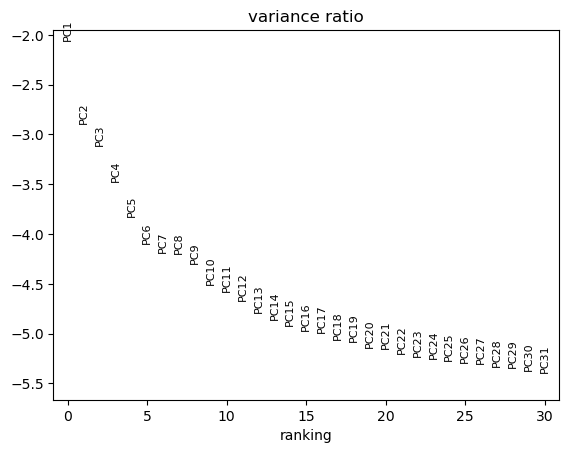

In [29]:
sc.pl.pca_variance_ratio(adata, log=True)

In [30]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=20)

In [31]:
sc.tl.umap(adata)

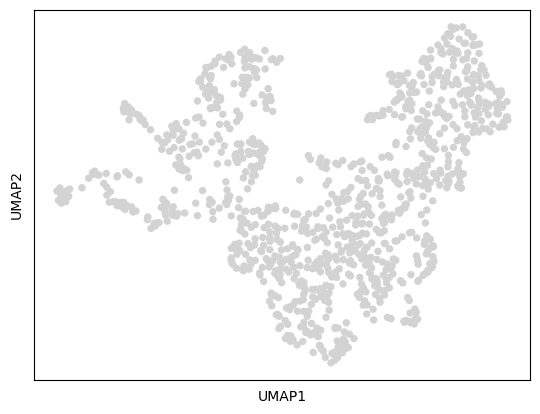

In [32]:
sc.pl.umap(adata)

In [33]:
!conda install -y -c anaconda cmake 
!pip install leidenalg
!pip install louvain

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 23.3.1

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - cmake


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2023.01.10 |       h06a4308_0         127 KB  anaconda
    certifi-2022.12.7          |   py37h06a4308_0         152 KB  anaconda
    cmake-3.22.1               |       h1fce559_0        14.9 MB  anaconda
    conda-23.1.0               |   py37h06a4308_0         955 KB  anaconda
    importlib_metadata-1.5.0   |           py37_0          47 KB  anaconda
    openssl-1.1.1s             |       h7f8727e_0         3.8 MB  anaconda
    pluggy-1.0.0               |   py37h06a4308_1          28 KB  anaconda
    rhash-1.4.1        

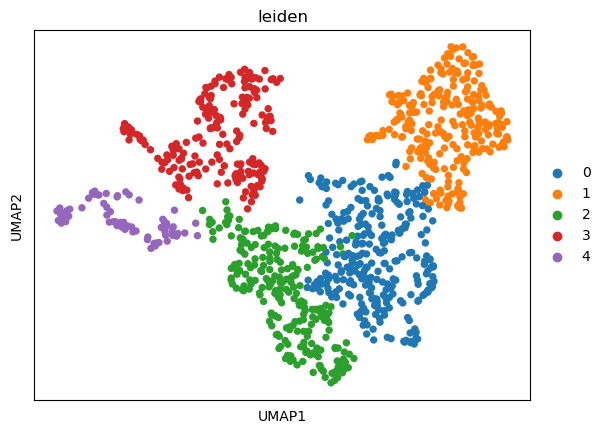

In [34]:
sc.tl.leiden(adata, resolution = 0.25)
sc.pl.umap(adata, color=['leiden'])

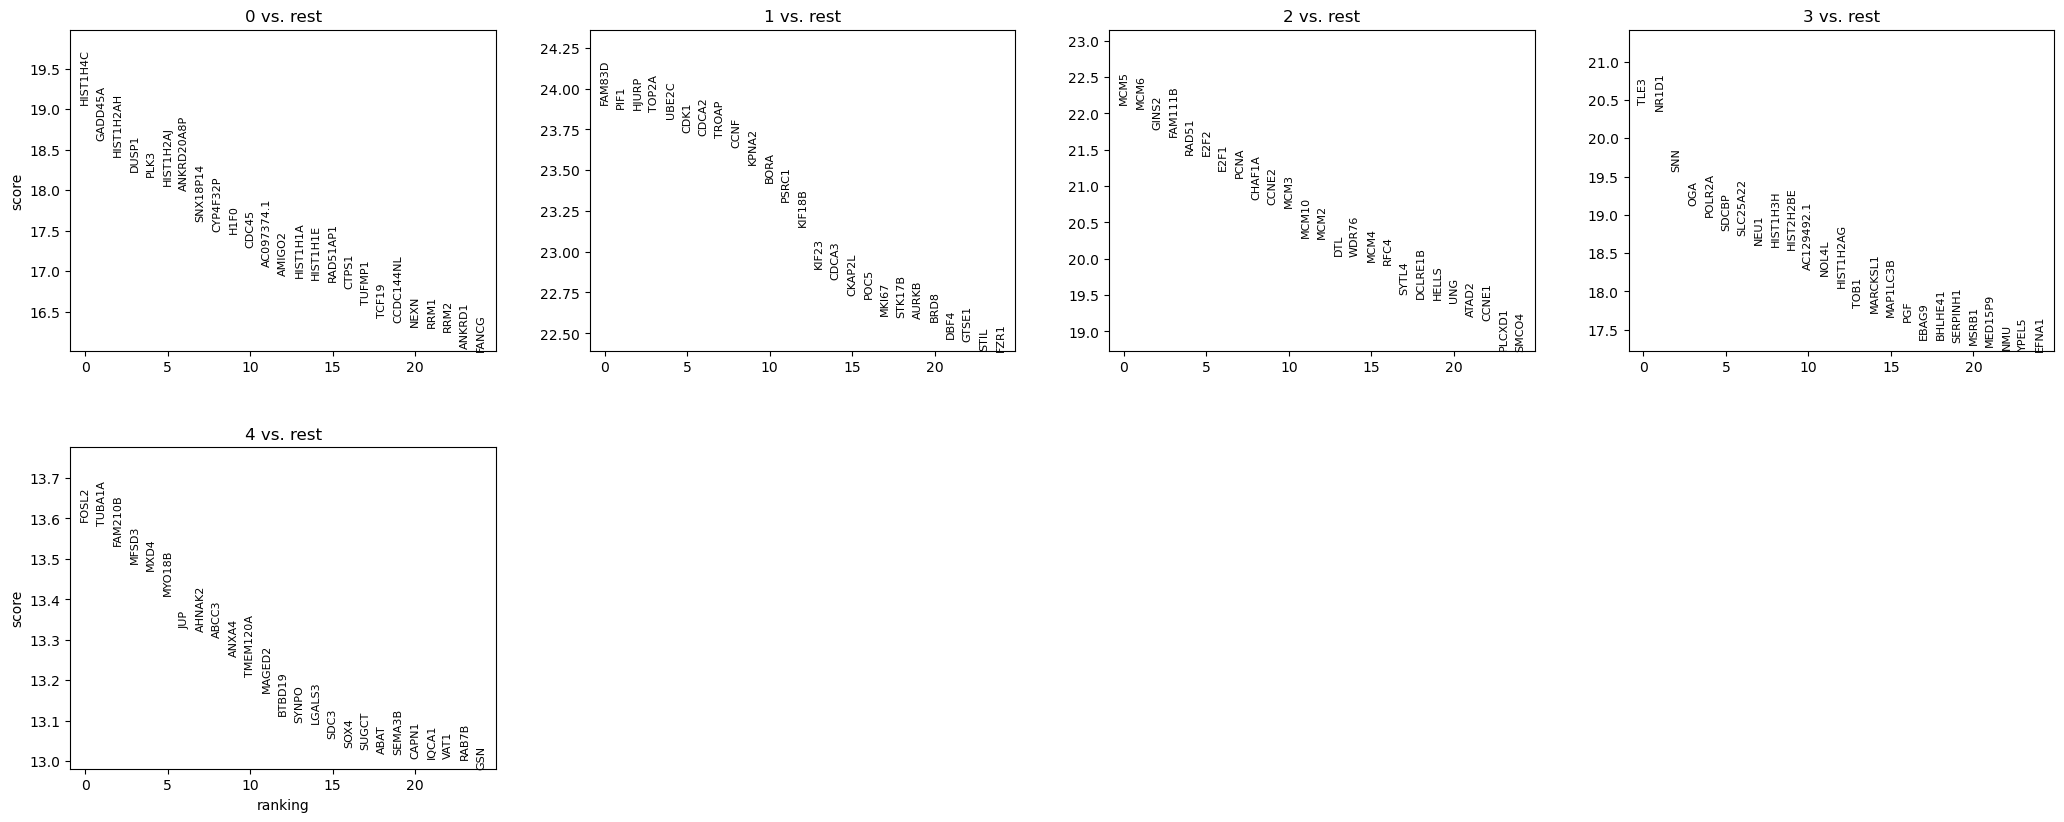

In [35]:
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

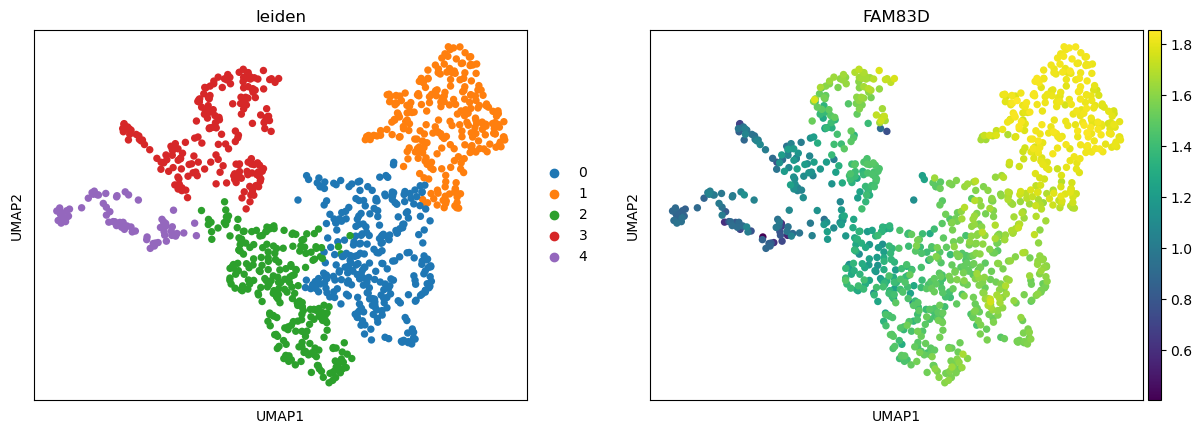

In [65]:
sc.pl.umap(adata, color=['leiden', 'FAM83D'])

In [71]:
results = adata.uns['rank_genes_groups']

In [72]:
results['names']['0']

array(['HIST1H4C', 'GADD45A', 'HIST1H2AH', ..., 'CD9', 'PMP22', 'MN1'],
      dtype=object)

In [73]:
results['names'].dtype.names

('0', '1', '2', '3', '4')

In [74]:
out = np.array([[0,0,0,0,0]])
for group in results['names'].dtype.names:
    out = np.vstack((out, np.vstack((results['names'][group],
                                     results['scores'][group],
                                     results['pvals_adj'][group],
                                     results['logfoldchanges'][group],
                                     np.array([group] * len(results['names'][group])).astype('object'))).T))

In [75]:
out.shape

(49696, 5)

In [85]:
markers = pd.DataFrame(out[1:], columns = ['Gene', 'scores', 'pval_adj', 'lfc', 'cluster'])

In [87]:
markers = markers[(markers.pval_adj < 0.05) & (abs(markers.lfc) > 1)]

In [78]:
markers[markers.cluster == '1']

,Gene,scores,pval_adj,lfc,cluster
9940,PIF1,23.881447,0.0,1.656415,1
9949,BORA,23.427208,0.0,1.00945,1
9995,STARD8,21.182167,0.0,1.316913,1
10001,ZNF165,20.947039,0.0,1.432667,1
10028,SHISA3,19.774689,0.0,1.819865,1
...,...,...,...,...,...
19848,CEBPD,-16.505962,0.0,-1.790774,1
19856,HIST1H1E,-17.145853,0.0,-1.102664,1
19859,LSAMP,-17.482527,0.0,-1.010385,1
19864,CCNE2,-17.880457,0.0,-2.109289,1


In [79]:
adata.raw.var_names

Index(['TSPAN6', 'SCYL3', 'C1orf112', 'CFH', 'GCLC', 'NFYA', 'NIPAL3', 'ENPP4',
       'SEMA3F', 'HS3ST1',
       ...
       'AL160171.1', 'AC072022.2', 'AC244102.3', 'AL138900.3', 'AL096794.1',
       'AL008725.1', 'AC022868.2', 'AL732406.1', 'AC116317.1', 'AC079790.2'],
      dtype='object', length=9939)

In [103]:
fam_i = np.where(adata.raw.var_names == 'FAM83D')[0][0]
fam_i

1255

In [104]:
fam = adata.raw.X[:, fam_i]
fam.shape

(1053,)

In [112]:
adata.obs['FAM'] = fam

In [113]:
adata.obs

,cell_cycle_phase,n_genes_by_counts,pct_counts_mt,total_counts,total_counts_mt,n_genes,leiden,FAM
onefilepercell_A10_R131824Aligned_and_others_NLM7W:A10_R131824Aligned.sortedByCoord.out.bam,G2M,6162,0.503497,10518.167969,52.958618,6162,0,1.700942
onefilepercell_A10_R131824Aligned_and_others_NLM7W:A11_R131824Aligned.sortedByCoord.out.bam,nan,6396,0.487870,10927.997070,53.314423,6396,0,1.121758
onefilepercell_A10_R131824Aligned_and_others_NLM7W:A13_R131824Aligned.sortedByCoord.out.bam,G2M,6260,0.503011,10490.178711,52.766750,6260,0,1.740536
onefilepercell_A10_R131824Aligned_and_others_NLM7W:A15_R131824Aligned.sortedByCoord.out.bam,S-ph,6054,0.506496,10446.540039,52.911263,6054,2,1.445905
onefilepercell_A10_R131824Aligned_and_others_NLM7W:A16_R131824Aligned.sortedByCoord.out.bam,G2M,6244,0.503625,10468.492188,52.721935,6244,1,1.833284
...,...,...,...,...,...,...,...,...
onefilepercell_A10_R131824Aligned_and_others_NLM7W:P5_R131824Aligned.sortedByCoord.out.bam-2,S-ph,6133,0.504713,10409.581055,52.538490,6133,0,1.758005
onefilepercell_A10_R131824Aligned_and_others_NLM7W:P6_R131824Aligned.sortedByCoord.out.bam-2,G2M,6179,0.499120,10471.568359,52.265713,6179,0,1.661386
onefilepercell_A10_R131824Aligned_and_others_NLM7W:P7_R131824Aligned.sortedByCoord.out.bam-2,G2M,6261,0.490409,10760.687500,52.771355,6261,1,1.838464
onefilepercell_A10_R131824Aligned_and_others_NLM7W:P8_R131824Aligned.sortedByCoord.out.bam-2,G2M,6116,0.503430,10479.337891,52.756157,6116,1,1.833025


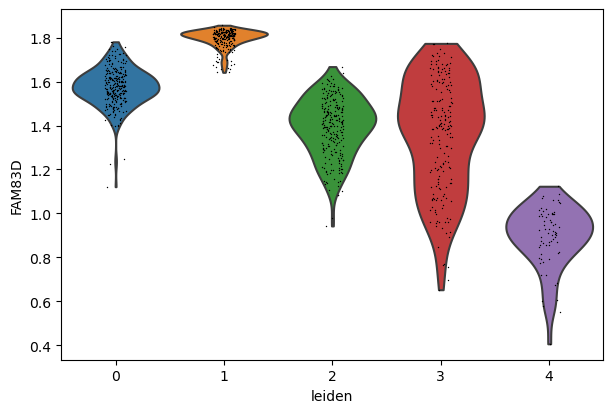

In [114]:
sc.pl.violin(adata, ['FAM83D'], groupby='leiden', use_raw = True)